## Mathematics and Methods in Machine Learning and Neural Networks
#### Ha Do, Melany Macias & Daniel R


In [1]:
# importing libraries  
import numpy as np
import matplotlib.pyplot as mtp  
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import plot_confusion_matrix

In [2]:
#importing datasets  
df = pd.read_csv("phishing.csv", sep="\s*;\s*", engine="python")
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWindow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


##### Check frequency distribution of values in varriables

In [3]:

col_names = ['having_IP_Address', 'Shortining_Service', 
             'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 
             'SSLfinal_State', 'Domain_registeration_length', 'Favicon',
             'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags',
             'SFH', 'Submitting_to_email', 'Abnormal_URL','Redirect', 'on_mouseover',
             'RightClick', 'popUpWindow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic',
             'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report', 'Result']
for col in col_names:
    
    print(df[col].value_counts())

 1    7262
-1    3793
Name: having_IP_Address, dtype: int64
 1    9611
-1    1444
Name: Shortining_Service, dtype: int64
 1    9400
-1    1655
Name: having_At_Symbol, dtype: int64
 1    9626
-1    1429
Name: double_slash_redirecting, dtype: int64
-1    9590
 1    1465
Name: Prefix_Suffix, dtype: int64
 1    4070
 0    3622
-1    3363
Name: having_Sub_Domain, dtype: int64
 1    6331
-1    3557
 0    1167
Name: SSLfinal_State, dtype: int64
-1    7389
 1    3666
Name: Domain_registeration_length, dtype: int64
 1    9002
-1    2053
Name: Favicon, dtype: int64
 1    9553
-1    1502
Name: port, dtype: int64
 1    9259
-1    1796
Name: HTTPS_token, dtype: int64
 1    6560
-1    4495
Name: Request_URL, dtype: int64
 0    5337
-1    3282
 1    2436
Name: URL_of_Anchor, dtype: int64
 0    4449
-1    3956
 1    2650
Name: Links_in_tags, dtype: int64
-1    8440
 1    1854
 0     761
Name: SFH, dtype: int64
 1    9041
-1    2014
Name: Submitting_to_email, dtype: int64
 1    9426
-1    1629
Name: Ab

In [4]:
# Convert Result column to str for futher assignments
df['Result'] = df['Result'].apply(str)
df['Result'] = df['Result'].str.replace('-1','legitimate site') # replace binary number for a sophicated name
df['Result'] = df['Result'].str.replace('1','phishing site')

In [5]:
# Explore Result variable
df['Result'].value_counts()

phishing site      6157
legitimate site    4898
Name: Result, dtype: int64

In [6]:
# check missing values in variables
df.isnull().sum()
## We can see that there are no missing values in the dataset

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWindow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

##### Declare feature vector and target variable

In [7]:
X = df.drop(['Result'], axis=1)

y = df['Result']

In [8]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

##### Encode categorical variables

In [9]:
# import category encoders
import category_encoders as ce
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['having_IP_Address', 'Shortining_Service', 
             'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 
             'SSLfinal_State', 'Domain_registeration_length', 'Favicon',
             'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags',
             'SFH', 'Submitting_to_email', 'Abnormal_URL','Redirect', 'on_mouseover',
             'RightClick', 'popUpWindow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic',
             'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWindow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
10498,1,-1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8673,2,-1,1,1,1,1,2,2,2,1,...,1,1,1,1,1,2,1,1,2,1
3429,1,-1,1,1,1,1,1,1,1,1,...,1,1,1,2,2,1,1,1,1,1
821,1,-1,1,1,1,2,1,2,1,1,...,1,1,1,1,1,2,1,1,2,1
2063,1,-1,1,1,1,1,1,2,1,1,...,1,1,1,2,1,2,2,1,1,1


#### Decision Tree Classifier with criterion gini index

In [10]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [11]:
# Predict the Test set results with criterion gini index
y_pred_gini = clf_gini.predict(X_test)

#### Check accuracy score with criterion gini index

In [12]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8994


#### Compare the train-set and test-set accuracy

In [13]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['legitimate site', 'phishing site', 'legitimate site', ...,
       'legitimate site', 'phishing site', 'legitimate site'],
      dtype=object)

In [14]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8975


#### Check for overfitting and underfitting

In [15]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8975
Test set score: 0.8994


#### Visualize decision-trees

[Text(306.90000000000003, 380.52, 'X[7] <= 1.5\ngini = 0.495\nsamples = 7406\nvalue = [3333, 4073]'),
 Text(167.4, 271.8, 'X[5] <= 1.5\ngini = 0.237\nsamples = 2420\nvalue = [2087, 333]'),
 Text(111.60000000000001, 163.07999999999998, 'X[13] <= 1.5\ngini = 0.198\nsamples = 2349\nvalue = [2087, 262]'),
 Text(55.800000000000004, 54.360000000000014, 'gini = 0.367\nsamples = 808\nvalue = [612, 196]'),
 Text(167.4, 54.360000000000014, 'gini = 0.082\nsamples = 1541\nvalue = [1475, 66]'),
 Text(223.20000000000002, 163.07999999999998, 'gini = 0.0\nsamples = 71\nvalue = [0, 71]'),
 Text(446.40000000000003, 271.8, 'X[7] <= 2.5\ngini = 0.375\nsamples = 4986\nvalue = [1246, 3740]'),
 Text(334.8, 163.07999999999998, 'X[25] <= 1.5\ngini = 0.202\nsamples = 4201\nvalue = [479, 3722]'),
 Text(279.0, 54.360000000000014, 'gini = 0.46\nsamples = 774\nvalue = [278, 496]'),
 Text(390.6, 54.360000000000014, 'gini = 0.11\nsamples = 3427\nvalue = [201, 3226]'),
 Text(558.0, 163.07999999999998, 'X[13] <= 1.5\ng

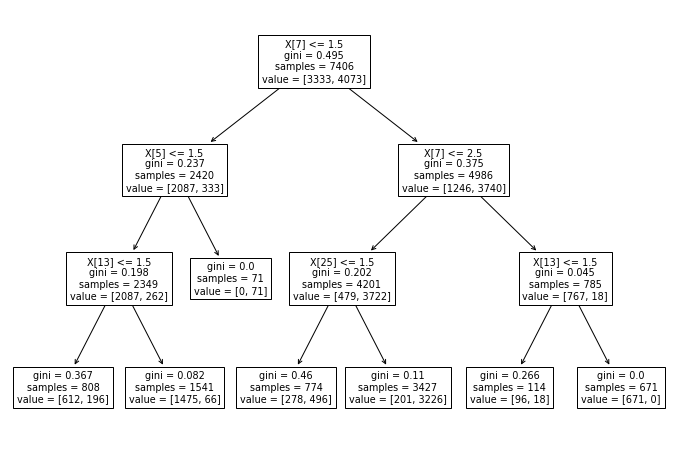

In [16]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

#### Visualize decision-trees with graphviz

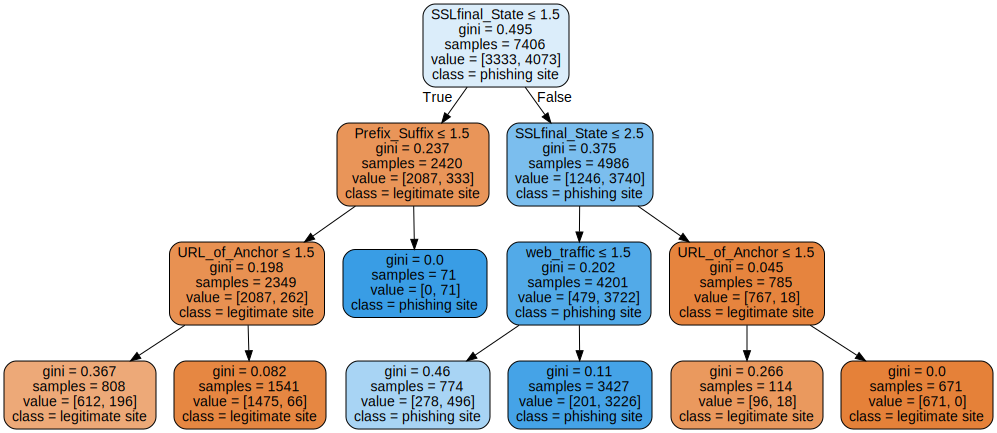

In [19]:
# Plotting Decision Tree with with graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'
target = list(df['Result'].unique())
feature_names = list(X.columns)
import graphviz
dot_data = tree.export_graphviz(clf_gini,
                                out_file=None, 
                      feature_names=feature_names,  
                      class_names=target,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

graph

#### Decision Tree Classifier with criterion entropy

In [21]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

#### Predict the Test set results with criterion entropy

In [22]:
y_pred_en = clf_en.predict(X_test)

#### Check accuracy score with criterion entropy

In [23]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8994


#### Compare the train-set and test-set accuracy

In [24]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['legitimate site', 'phishing site', 'legitimate site', ...,
       'legitimate site', 'phishing site', 'legitimate site'],
      dtype=object)

In [25]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8975


#### Check for overfitting and underfitting

In [26]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8975
Test set score: 0.8994


###### We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 0.8975 while the test-set accuracy to be 0.8994. These two values are quite comparable. So, there is no sign of overfitting.

#### Visualize decision-trees

[Text(306.90000000000003, 380.52, 'X[7] <= 1.5\nentropy = 0.993\nsamples = 7406\nvalue = [3333, 4073]'),
 Text(167.4, 271.8, 'X[5] <= 1.5\nentropy = 0.578\nsamples = 2420\nvalue = [2087, 333]'),
 Text(111.60000000000001, 163.07999999999998, 'X[13] <= 1.5\nentropy = 0.505\nsamples = 2349\nvalue = [2087, 262]'),
 Text(55.800000000000004, 54.360000000000014, 'entropy = 0.799\nsamples = 808\nvalue = [612, 196]'),
 Text(167.4, 54.360000000000014, 'entropy = 0.255\nsamples = 1541\nvalue = [1475, 66]'),
 Text(223.20000000000002, 163.07999999999998, 'entropy = 0.0\nsamples = 71\nvalue = [0, 71]'),
 Text(446.40000000000003, 271.8, 'X[7] <= 2.5\nentropy = 0.811\nsamples = 4986\nvalue = [1246, 3740]'),
 Text(334.8, 163.07999999999998, 'X[25] <= 1.5\nentropy = 0.512\nsamples = 4201\nvalue = [479, 3722]'),
 Text(279.0, 54.360000000000014, 'entropy = 0.942\nsamples = 774\nvalue = [278, 496]'),
 Text(390.6, 54.360000000000014, 'entropy = 0.322\nsamples = 3427\nvalue = [201, 3226]'),
 Text(558.0, 163.

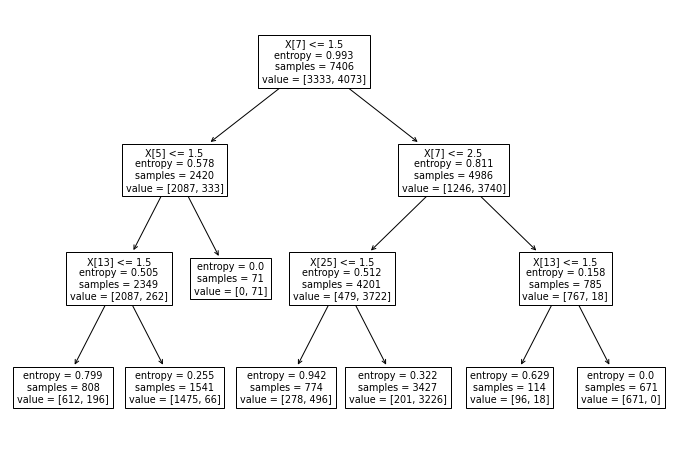

In [27]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

#### Visualize decision-trees with graphviz

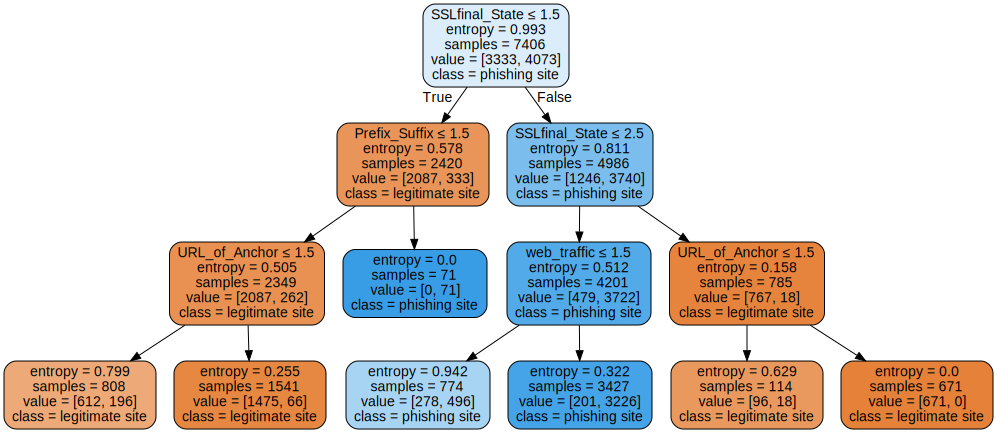

In [29]:
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=feature_names,  
                              class_names=target,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

#### Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels. But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making. We have another tool called Confusion matrix that comes to our rescue.

#### By using 2 algrorithm methods to analysis, we can conclude that our classification model accuracy is very good. The result is given the same prediction.

#### Confusion matrix

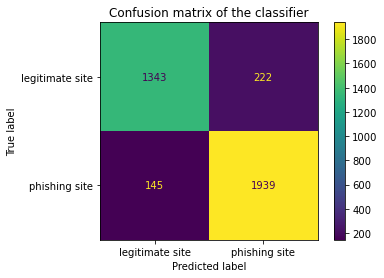

In [32]:
# draw a confusion matrix for the tree with criterion gini index
import warnings
warnings.filterwarnings('ignore')

plot_confusion_matrix(clf_gini,X_test,y_test,display_labels=target)
plt.title('Confusion matrix of the classifier')
plt.show()

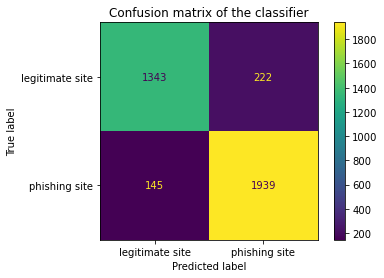

In [34]:
# draw a confusion matrix for the tree with criterion entropy
import warnings
warnings.filterwarnings('ignore')

plot_confusion_matrix(clf_en,X_test,y_test,display_labels=target)
plt.title('Confusion matrix of the classifier')
plt.show()

In [30]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1343  222]
 [ 145 1939]]


#### Classification Report

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

                 precision    recall  f1-score   support

legitimate site       0.90      0.86      0.88      1565
  phishing site       0.90      0.93      0.91      2084

       accuracy                           0.90      3649
      macro avg       0.90      0.89      0.90      3649
   weighted avg       0.90      0.90      0.90      3649



#### Results and conclusion

##### In this assignment, I build a Decision-Tree Classifier model to predict a family of online frauds. I used two models are criterion gini index and another one with criterion entropy. According to my evaluation, the model presents very good indication by a high accuracy which was found to be 0.8994.

##### In the model criterion gini index, the training-set accuracy score is 0.8975 while the test-set accuracy to be 0.8994 and these two values are quiet comparable, so there is no sign of overfitting. Besides, model with criterion entropy is the same result with the model criterion gini index

#### References codes
###### Decision-Tree Classifier Tutorial by PRASHANT BANERJEE
https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial